In [1]:
import warnings
warnings.filterwarnings('ignore')
from sys import argv
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks',color_codes=True)
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
from scipy.stats import ttest_1samp,wilcoxon,shapiro,ttest_ind,mannwhitneyu,levene,bartlett
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chisquare,chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare,chi2_contingency,f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import ProbPlot
import pylab
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering 

In [2]:
data=pd.read_csv('results-NT01.csv')
data.head()

,BATCH_ID,CALL_ORIG,CALL_ANS,CALL_DISCNT,CONV_SEC,CALLING_NUM,DIAL_NUM,CALLED_NUM,ORIG_OPER,TERM_OPER
0,20191023,2019-10-23T21:03:25,2019-10-23T21:03:29,2019-10-23T21:05:49,140,98584323,28393384,28393384,HTCL,PCCW
1,20191023,2019-10-23T13:34:48,2019-10-23T13:34:51,2019-10-23T13:35:25,34,61712572,58084602,58084602,HTCL,PCCW
2,20191023,2019-10-23T14:36:45,2019-10-23T14:36:55,2019-10-23T14:37:14,19,96063495,36918050,415776278,HTCL,PCCW
3,20191023,2019-10-23T15:23:57,2019-10-23T15:24:16,2019-10-23T15:24:39,23,97090459,28042373,28042373,HTCL,PCCW
4,20191023,2019-10-23T12:06:18,2019-10-23T12:06:23,2019-10-23T12:06:37,14,61866381,36050646,36050646,HTCL,PCCW


In [3]:
data.shape

(16000, 10)

In [4]:
data.describe()

,BATCH_ID,CONV_SEC,CALLING_NUM,DIAL_NUM,CALLED_NUM
count,1.600000e+04,16000.000000,1.600000e+04,1.600000e+04,1.600000e+04
mean,2.019102e+07,102.711375,1.261848e+08,4.556714e+13,4.538291e+13
std,3.601849e+00,297.553079,2.020537e+09,2.304346e+15,2.304260e+15
min,2.019102e+07,0.000000,1.523810e+07,1.000000e+02,1.000000e+02
25%,2.019102e+07,6.000000,6.229301e+07,2.392517e+07,2.394612e+07
50%,2.019102e+07,31.000000,9.108464e+07,2.655283e+07,2.656646e+07
75%,2.019102e+07,91.000000,9.488526e+07,2.866815e+07,2.867368e+07
max,2.019102e+07,11306.000000,8.529872e+10,1.634186e+17,1.634186e+17


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 10 columns):
BATCH_ID       16000 non-null int64
CALL_ORIG      16000 non-null object
CALL_ANS       16000 non-null object
CALL_DISCNT    16000 non-null object
CONV_SEC       16000 non-null int64
CALLING_NUM    16000 non-null int64
DIAL_NUM       16000 non-null int64
CALLED_NUM     16000 non-null int64
ORIG_OPER      16000 non-null object
TERM_OPER      16000 non-null object
dtypes: int64(5), object(5)
memory usage: 1.2+ MB


In [6]:
data.columns

Index(['BATCH_ID', 'CALL_ORIG', 'CALL_ANS', 'CALL_DISCNT', 'CONV_SEC',
       'CALLING_NUM', 'DIAL_NUM', 'CALLED_NUM', 'ORIG_OPER', 'TERM_OPER'],
      dtype='object')

In [7]:
data.ORIG_OPER.value_counts()

HTCL    15244
HGC       750
SMT         4
PCCW        1
STSL        1
Name: ORIG_OPER, dtype: int64

From the above count originating company there are 5 different originating company to this switch HTCT,HGC,SMT,PCCW,StSL

HTCl is the highest opereating company where as PCCW and STSL is the lowest.  

In [8]:
data.BATCH_ID.value_counts()

20191016    5475
20191024    3835
20191017    3460
20191023    3018
20191015     212
Name: BATCH_ID, dtype: int64

In [9]:
data.TERM_OPER.value_counts()

PCCW    16000
Name: TERM_OPER, dtype: int64

In [10]:
#Converting the date columns to date time
data['CALL_ORIG'] = pd.to_datetime(data['CALL_ORIG'], format = '%Y-%m-%d %H:%M:%S')
data['CALL_ANS'] = pd.to_datetime(data['CALL_ANS'], format = '%Y-%m-%d %H:%M:%S')
data['CALL_DISCNT'] = pd.to_datetime(data['CALL_DISCNT'], format = '%Y-%m-%d %H:%M:%S')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 10 columns):
BATCH_ID       16000 non-null int64
CALL_ORIG      16000 non-null datetime64[ns]
CALL_ANS       16000 non-null datetime64[ns]
CALL_DISCNT    16000 non-null datetime64[ns]
CONV_SEC       16000 non-null int64
CALLING_NUM    16000 non-null int64
DIAL_NUM       16000 non-null int64
CALLED_NUM     16000 non-null int64
ORIG_OPER      16000 non-null object
TERM_OPER      16000 non-null object
dtypes: datetime64[ns](3), int64(5), object(2)
memory usage: 1.2+ MB


In [12]:
def hr_func(ts):
    return ts.hour

data['hour'] = data['CALL_ORIG'].apply(hr_func)

In [13]:
data.head()

,BATCH_ID,CALL_ORIG,CALL_ANS,CALL_DISCNT,CONV_SEC,CALLING_NUM,DIAL_NUM,CALLED_NUM,ORIG_OPER,TERM_OPER,hour
0,20191023,2019-10-23 21:03:25,2019-10-23 21:03:29,2019-10-23 21:05:49,140,98584323,28393384,28393384,HTCL,PCCW,21
1,20191023,2019-10-23 13:34:48,2019-10-23 13:34:51,2019-10-23 13:35:25,34,61712572,58084602,58084602,HTCL,PCCW,13
2,20191023,2019-10-23 14:36:45,2019-10-23 14:36:55,2019-10-23 14:37:14,19,96063495,36918050,415776278,HTCL,PCCW,14
3,20191023,2019-10-23 15:23:57,2019-10-23 15:24:16,2019-10-23 15:24:39,23,97090459,28042373,28042373,HTCL,PCCW,15
4,20191023,2019-10-23 12:06:18,2019-10-23 12:06:23,2019-10-23 12:06:37,14,61866381,36050646,36050646,HTCL,PCCW,12


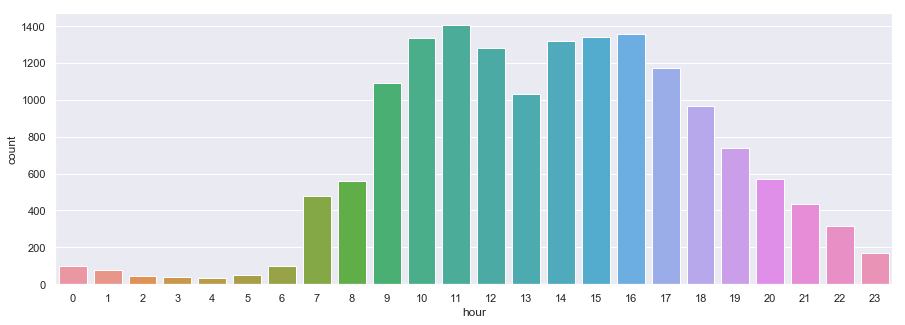

In [14]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(x="hour", data=data)
plt.show()

From the about count plot high traffic in 11th hour and lowest at 2,3 and 4 hours respectly  

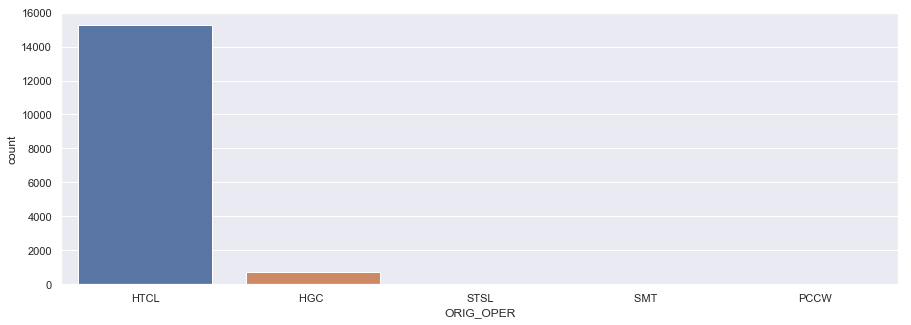

In [15]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(x="ORIG_OPER", data=data)
plt.show()

From the above plot originating company there are 5 different originating company to this switch HTCT,HGC,SMT,PCCW,StSL

HTCl is the highest opereating company where as PCCW and STSL is the lowest.  

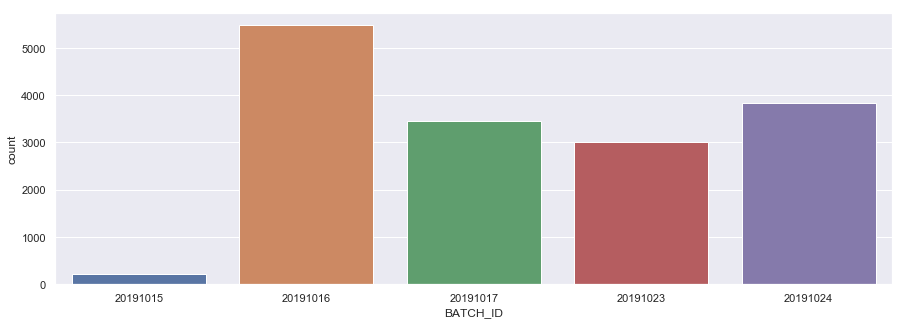

In [16]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(x="BATCH_ID", data=data)
plt.show()

From the above plot the are highest calls in the batch 20191016 and less in the 20191015 

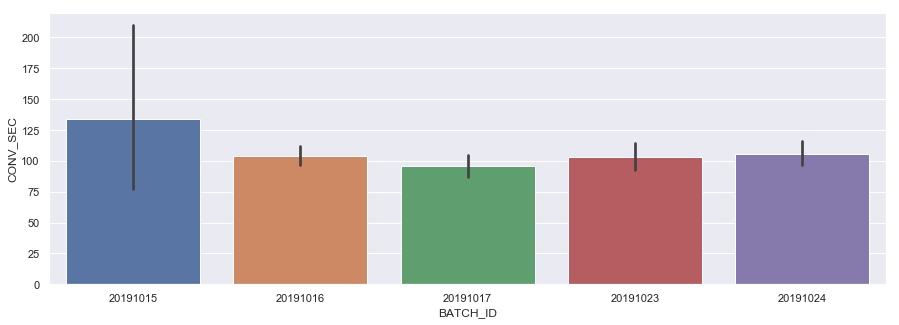

In [55]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="CONV_SEC", x="BATCH_ID", data=data)
plt.show()

From the above plot 20191015 recorded and lowest in the 20191017

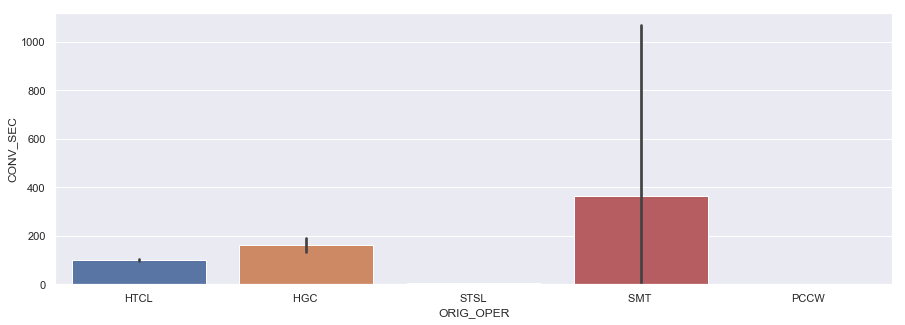

In [56]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="CONV_SEC", x="ORIG_OPER", data=data)
plt.show()

From the above plot we can observe that SMT originating company has more conversation then others and STSL originating company is the lowest

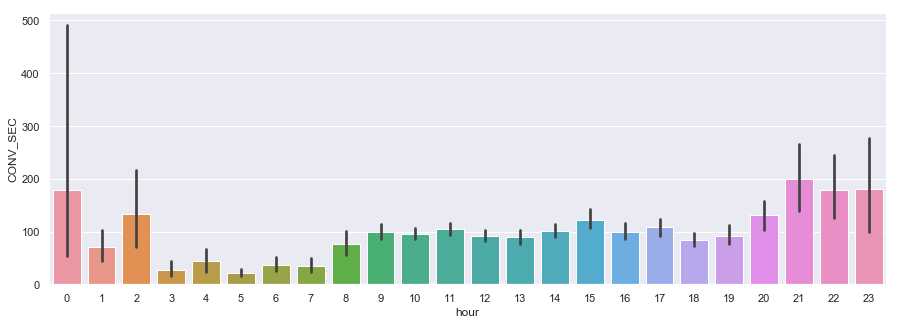

In [39]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="CONV_SEC", x="hour", data=data)
plt.show()

From the above plot at hour 22 has more conversation sec and hour 5 hour has less converastion time

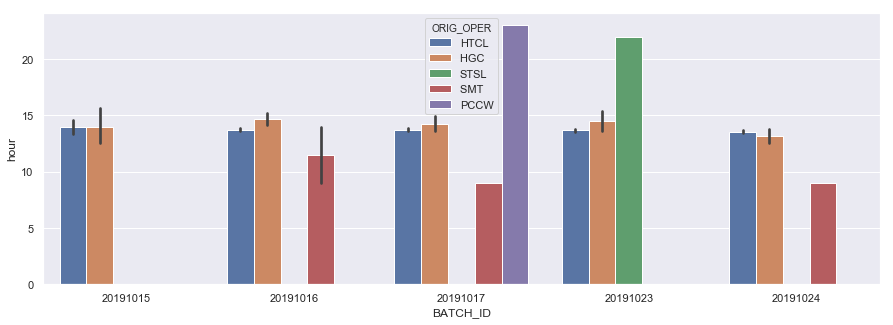

In [18]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="hour", x="BATCH_ID",hue="ORIG_OPER", data=data)
plt.show()

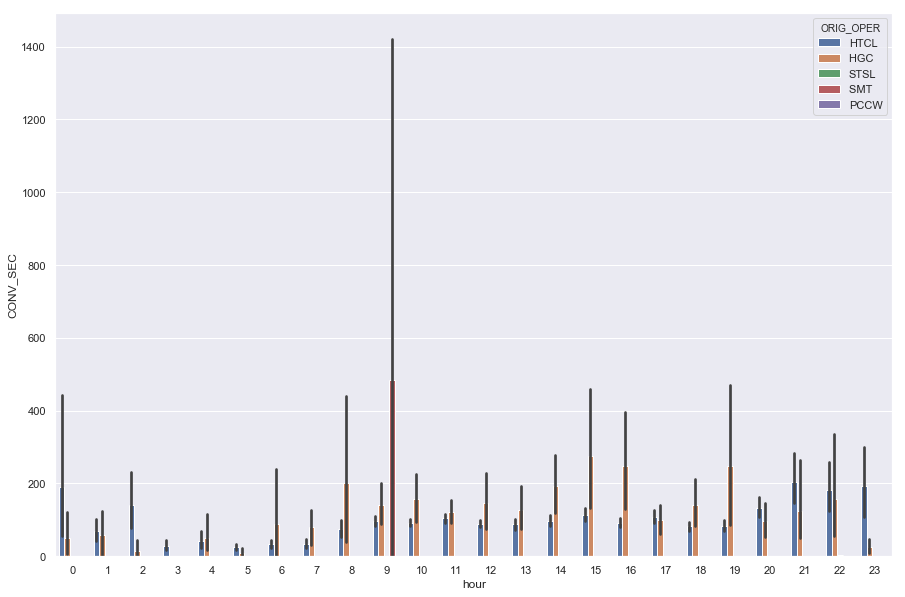

In [53]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,10))
sns.barplot(x="hour", y="CONV_SEC",hue="ORIG_OPER", data=data)
plt.show()

### KMeans clustering

In [22]:
col_names=['hour','CONV_SEC']

In [23]:
data1=data[col_names]

In [24]:
dataz=data1.apply(zscore)
dataz.head()

,hour,CONV_SEC
0,1.698952,0.125321
1,-0.166187,-0.230929
2,0.066956,-0.281341
3,0.300098,-0.267898
4,-0.399329,-0.298146


In [25]:
cluster_range=range(1,15)
cluster_error=[]
for num_cluster in cluster_range:
    model=KMeans(num_cluster)
    model.fit(dataz)
    cluster_error.append(model.inertia_)

In [26]:
labels=model.labels_
centroids=model.cluster_centers_

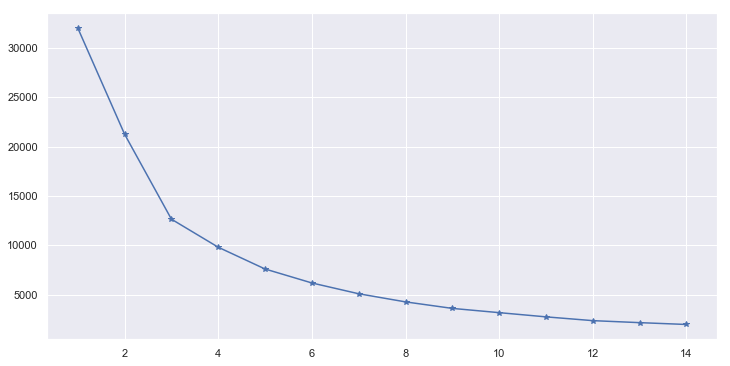

In [27]:
plt.figure(figsize=(12,6))
plt.plot(cluster_range,cluster_error,marker='*')

#### For the cluster 3

In [28]:
kmeans=KMeans(n_clusters=3,n_init=15,random_state=2)

In [29]:
kmeans.fit(dataz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [30]:
centroids=kmeans.cluster_centers_
centroids

array([[-0.85840588, -0.08599158],
       [ 0.77799875, -0.05525498],
       [ 0.34114402,  7.80900552]])

In [31]:
centroids_data=pd.DataFrame(centroids,columns=list(dataz))

In [32]:
centroids_data

,hour,CONV_SEC
0,-0.858406,-0.085992
1,0.777999,-0.055255
2,0.341144,7.809006


In [33]:
kmeans.labels_[:30]

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1])

In [34]:
data1['labels']=kmeans.labels_
data1.head()

,hour,CONV_SEC,labels
0,21,140,1
1,13,34,0
2,14,19,1
3,15,23,1
4,12,14,0


In [35]:
data1.labels.value_counts()

1    8289
0    7569
2     142
Name: labels, dtype: int64

#### For the cluster 2

In [57]:
kmeans=KMeans(n_clusters=2,n_init=15,random_state=2)

In [59]:
kmeans.fit(dataz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [60]:
centroids=kmeans.cluster_centers_
centroids

array([[-0.86036514, -0.05632282],
       [ 0.7776456 ,  0.05090768]])

In [61]:
centroids_data=pd.DataFrame(centroids,columns=list(dataz))

In [62]:
centroids_data

,hour,CONV_SEC
0,-0.860365,-0.056323
1,0.777646,0.050908


In [63]:
kmeans.labels_[:30]

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1])

In [64]:
data1['labels']=kmeans.labels_
data1.head()

,hour,CONV_SEC,labels
0,21,140,1
1,13,34,0
2,14,19,1
3,15,23,1
4,12,14,0


In [65]:
data1.labels.value_counts()

1    8403
0    7597
Name: labels, dtype: int64